# 18-6-1-DRILL-Making-predictions

## Making Prediction: House prices model

In this exercise, you'll predict house prices using your model. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

* Load the housing prices data from Thinkful's database.
* Split your data into train and test sets.
* Estimate your model from the previous checkpoint in the train set. Assess the goodness of fit of your model.
* Predict the house prices in the test set, and evaluate the performance of your model using the metrics we mentioned in this checkpoint.
* Is the performance of your model satisfactory? Why?
* Try to improve your model in terms of predictive performance by adding or removing some variables.

* Please submit a link your work notebook. This is not a graded checkpoint, but you should discuss your solutions with your mentor. Also, when you're done, compare your work to this example solution. https://github.com/Thinkful-Ed/machine-learning-regression-problems/blob/master/notebooks/6.solution_making_predictions.ipynb

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

import warnings
warnings.filterwarnings('ignore')

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
#postgres_user = 'dsbc_student'
#postgres_pw = '7*.8G9QH21'
#postgres_host = '142.93.121.174'
#postgres_port = '5432'
#postgres_db = 'weatherinszeged'

### Load the data 

In [2]:
#engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    #postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
#weather = pd.read_sql_query('select * from weatherinszeged',con=engine)

# no need for an open connection, as we're only doing a single query
#engine.dispose()


houseprices = pd.read_csv('housing-train.csv')

houseprices.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.000,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.000,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,nan,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.000,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.000,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
#houseprices.info()

In [3]:
housePrices_df = houseprices.iloc[:,[18,19,49,50,51,56, 61,80]]

In [4]:
### rename columns
housePrices_df.rename(columns={'OverallCond': 'overallcond', 
                                'YearBuilt': 'yearbuilt', 'FullBath': 'fullbath', 
                                'HalfBath': 'halfbath', 'BedroomAbvGr': 'bedroomabvgr', 'Fireplaces': 'fireplaces',
                                'GarageCars': 'garagecars', 'SaleCondition': 'salecondition', 'SalePrice': 'saleprice'}, inplace=True)

In [5]:
# Y is the target variable
Y = housePrices_df['saleprice'].values

# X is the feature set which includes  
X = housePrices_df[['overallcond', 'yearbuilt', 'fullbath', 'halfbath', 'bedroomabvgr','fireplaces','garagecars']]

### Split your data into train and test sets.
### Estimate your model from the previous checkpoint in the train set. Assess the goodness of fit of your model.
### Predict the house prices in the test set, and evaluate the performance of your model using the metrics we mentioned in this checkpoint.

In [9]:
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

results = sm.OLS(y_train, X_train).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     269.8
Date:                Sat, 15 Feb 2020   Prob (F-statistic):          2.83e-238
Time:                        21:36:08   Log-Likelihood:                -14248.
No. Observations:                1168   AIC:                         2.851e+04
Df Residuals:                    1160   BIC:                         2.855e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.142e+06   1.27e+05     -8.988      0.000   -1.39e+06   -8.93e+05
overallcond   9017.8767   1353.497      6.663      0.000    6362.301    1.17e+04
yearbuilt      566.6176     64.129      8.836      0.000     440.796     692.439
fullbath      3.448e+04   3394.756     10.158      0.000    2.78e+04    4.11e+04
halfbath      9799.7155   3052.154      3.211      0.001    3811.355    1.58e+04
bedroomabvgr  5338.6609   2065.179      2.585      0.010    1286.757    9390.564
fireplaces    3.033e+04   2359.692     12.852      0.000    2.57e+04     3.5e+04
garagecars    3.611e+04   2434.173     14.833      0.000    3.13e+04    4.09e+04
==============================================================================
Omnibus:                      504.997   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4375.482
Skew:                           1.773   Prob(JB):                         0.00
Kurtosis:                      11.794   Cond. No.                     1.78e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

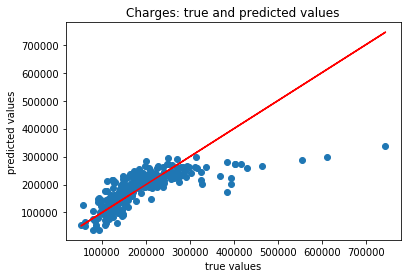

Mean absolute error of the prediction is: 36574.79142517285
Mean squared error of the prediction is: 3346187165.6297164
Root mean squared error of the prediction is: 57846.23726423108
Mean absolute percentage error of the prediction is: 19.673969707133686


In [10]:
# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))


In [11]:
housePrices_df['total_bath'] = housePrices_df['fullbath'] + housePrices_df['halfbath'] 

In [12]:
housePrices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
overallcond     1460 non-null int64
yearbuilt       1460 non-null int64
fullbath        1460 non-null int64
halfbath        1460 non-null int64
bedroomabvgr    1460 non-null int64
fireplaces      1460 non-null int64
garagecars      1460 non-null int64
saleprice       1460 non-null int64
total_bath      1460 non-null int64
dtypes: int64(9)
memory usage: 102.8 KB


In [13]:
# Y is the target variable
Y2 = np.log1p(housePrices_df['saleprice'])
# X is the feature set which includes  
X2 = housePrices_df[['overallcond', 'yearbuilt', 'total_bath', 'bedroomabvgr','fireplaces','garagecars']]

In [14]:
X2 = sm.add_constant(X2)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size = 0.2, random_state = 465)

results = sm.OLS(y2_train, X2_train).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     475.9
Date:                Sat, 15 Feb 2020   Prob (F-statistic):          1.12e-308
Time:                        21:38:47   Log-Likelihood:                 141.03
No. Observations:                1168   AIC:                            -268.1
Df Residuals:                    1161   BIC:                            -232.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.1168      0.563      3.761      0.000       1.012       3.221
overallcond      0.0715      0.006     11.848      0.000       0.060       0.083
yearbuilt        0.0044      0.000     15.588      0.000       0.004       0.005
total_bath       0.0970      0.011      9.011      0.000       0.076       0.118
bedroomabvgr     0.0592      0.009      6.513      0.000       0.041       0.077
fireplaces       0.1588      0.011     15.084      0.000       0.138       0.179
garagecars       0.1923      0.011     17.890      0.000       0.171       0.213
==============================================================================
Omnibus:                       12.832   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               19.730
Skew:                           0.042   Prob(JB):                     5.20e-05
Kurtosis:                       3.631   Cond. No.                     1.76e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

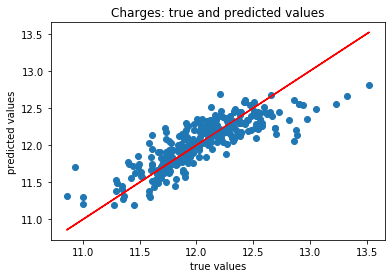

Mean absolute error of the prediction is: 183907.68570642604
Mean squared error of the prediction is: 41067363761.56759
Root mean squared error of the prediction is: 202650.84199570352
Mean absolute percentage error of the prediction is: 99.99237217183058


In [15]:
# We are making predictions here
y_preds = results.predict(X2_test)

plt.scatter(y2_test, y_preds)
plt.plot(y2_test, y2_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

The test set evaluation metrics are given above. For every metric, the second model achieves a better prediction performance in the test set.